In [ ]:
import supy as sp
import pandas as pd
import matplotlib.pyplot as plt
from .functions
pd.set_option('display.max_columns', 500)

sp.show_version()

SuPy version: 2024.12.3.dev
-------------


In [2]:
siteselect = pd.read_csv(infolder + 'a_24'+ '/Input/SUEWS_SiteSelect.txt', delim_whitespace=True)

siteselect.iloc[[0,1,2,3,4,10,11]]

NameError: name 'infolder' is not defined

In [11]:
infolder = 'C:/GitHub/SUEWS_DB_Typology_test/data/'

version = 'sample_stebb'
rc = infolder + version +'/Runcontrol.nml'
print(rc)

df_state_init = sp.init_supy(rc)

grid = df_state_init.index[0]
df_forcing = sp.load_forcing_grid(rc, grid)
# sp.check_state(df_state_init.loc[grids])

C:/GitHub/SUEWS_DB_Typology_test/data/sample_stebb/Runcontrol.nml
2024-12-04 09:32:36,235 - SuPy - INFO - All cache cleared.


--- Logging error ---
Traceback (most recent call last):
  File "c:\Users\xbacos\miniconda3\envs\supy_env\Lib\logging\handlers.py", line 74, in emit
    self.doRollover()
  File "c:\Users\xbacos\miniconda3\envs\supy_env\Lib\logging\handlers.py", line 443, in doRollover
    self.rotate(self.baseFilename, dfn)
  File "c:\Users\xbacos\miniconda3\envs\supy_env\Lib\logging\handlers.py", line 115, in rotate
    os.rename(source, dest)
PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'c:\\GitHub\\SUEWS_DB_Typology_test\\code\\SuPy.log' -> 'c:\\GitHub\\SUEWS_DB_Typology_test\\code\\SuPy.log.2024-12-03'
Call stack:
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\xbacos\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\xbacos\AppData\Roaming\Python\Python312\site-packages\tr

2024-12-04 09:32:37,420 - SuPy - INFO - All cache cleared.


--- Logging error ---
Traceback (most recent call last):
  File "c:\Users\xbacos\miniconda3\envs\supy_env\Lib\logging\handlers.py", line 74, in emit
    self.doRollover()
  File "c:\Users\xbacos\miniconda3\envs\supy_env\Lib\logging\handlers.py", line 443, in doRollover
    self.rotate(self.baseFilename, dfn)
  File "c:\Users\xbacos\miniconda3\envs\supy_env\Lib\logging\handlers.py", line 115, in rotate
    os.rename(source, dest)
PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'c:\\GitHub\\SUEWS_DB_Typology_test\\code\\SuPy.log' -> 'c:\\GitHub\\SUEWS_DB_Typology_test\\code\\SuPy.log.2024-12-03'
Call stack:
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\xbacos\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\xbacos\AppData\Roaming\Python\Python312\site-packages\tr

In [3]:

def merge_grids_to_df(smh5, grids, start_date, end_date, variable):
    # Initialize an empty list to store DataFrames
    df_list = []
    
    # Iterate over each grid and extract the relevant slice
    for grid in grids:
        df_slice = smh5.loc[grid].loc[start_date:end_date, variable]
        df_slice = df_slice.reset_index()  # Reset index to avoid issues with concatenation
        df_slice['grid'] = grid  # Add a column to identify the grid
        df_list.append(df_slice)
    
    # Concatenate all slices into a single DataFrame
    merged_df = pd.concat(df_list, ignore_index=True)
    
    # Pivot the DataFrame to have grids as columns
    pivot_df = merged_df.pivot(index='datetime', columns='grid', values=variable)
    
    return pivot_df

# # Example usage
# smh5 = df_output_merge_SHM5.SUEWS
# s = '2017-01-01'
# e = '2017-01-02'
# grids = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
# variable = 'QS'

# merged_df = merge_grids_to_df(smh5, grids, s, e, variable)
# print()

NameError: name 'smh5' is not defined

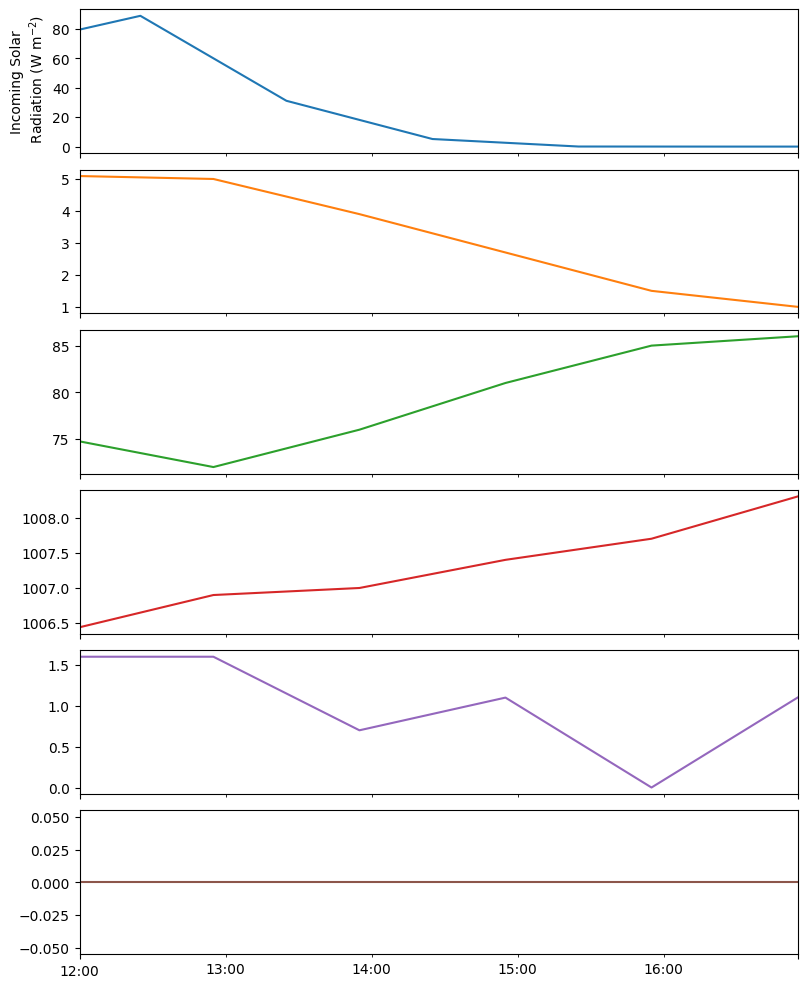

In [4]:
list_var_forcing = [
    "kdown",
    "Tair",
    "RH",
    "pres",
    "U",
    "rain",
]
dict_var_label = {
    "kdown": "Incoming Solar\n Radiation ($ \mathrm{W \ m^{-2}}$)",
    "Tair": "Air Temperature (C°)",
    "RH": r"Relative Humidity (%)",
    "pres": "Air Pressure (hPa)",
    "rain": "Rainfall (mm)",
    "U": "Wind Speed (m $\mathrm{s^{-1}}$)",
}


s = '2017-01-01 12:00'
e = '2017-01-01 17:00'


df_plot_forcing_x = (
    df_forcing.loc[s:e, list_var_forcing].copy().shift(-1).dropna(how="any")
)
# df_plot_forcing = df_plot_forcing_x.resample("1h").mean()
# df_plot_forcing_x["rain"] = df_plot_forcing_x["rain"].resample("10min").sum()

axes = df_plot_forcing_x.plot(subplots=True, figsize=(8, 12), legend=False,)
fig = axes[0].figure
fig.tight_layout()
fig.autofmt_xdate(bottom=0.2, rotation=0, ha="center")

var = 'QN'
for ax, invar in zip(axes, list_var_forcing):
    ax.set_ylabel(dict_var_label[invar])

    merge_grids_to_df(smh5, grids, s, e, var).plot(ax=ax, secondary_y=True, color = 'grey', alpha = 0.5, linewidth = 0.5, legend = None)
    # merge_grids_to_df(smh5, grids, s, e, 'QHlumps').plot(ax=ax, secondary_y=True, color = 'red', alpha = 0.2, linewidth = 0.5, legend = None)
    ax.right_ax.set_ylabel(dict_var_label['kdown'])
    # ax.right_ax.legend(var)


In [57]:
# df_forcing.loc['2017-01-01 15:00':'2017-01-01 16:00' ].plot()
var = 'QN'
s = '2017-01-01 15:50'
e = '2017-01-01 16:10'
merge_grids_to_df(smh5, grids, s, e, var)

grid,1,2,3,4,5,6,7,8,9,10,11,12
datetime,,,,,,,,,,,,
2017-01-01 15:50:00,-39.742220,-40.807487,-45.136732,-46.488564,-45.463954,-49.339408,-41.398530,-49.755168,-44.805781,-38.348726,-60.362326,-50.600413
2017-01-01 15:55:00,-39.623409,-40.671719,-44.953498,-46.285000,-45.277924,-49.105334,-41.257059,-49.501556,-44.626477,-38.181594,-59.975321,-50.352416
2017-01-01 16:00:00,-600.000000,-600.000000,-44.770074,-46.081185,-45.091669,-48.871014,-41.115108,-49.257316,-44.435811,-600.000000,-59.606969,-50.089203
2017-01-01 16:05:00,-600.000000,-600.000000,-44.722116,-46.032661,-45.024261,-48.799355,-41.255336,-49.231437,-44.400325,-600.000000,-59.539557,-50.064492
2017-01-01 16:10:00,-600.000000,-600.000000,-44.669861,-45.971600,-45.021764,-48.722829,-41.058879,-49.091043,-44.328385,-600.000000,-59.407871,-49.922170


In [ ]:
def process_in_chunks(df_state_init, df_forcing, chunk_size=5):
    df_output_list = []
    df_state_final_list = []
    
    # Calculate the number of chunks needed
    num_iterations = (len(df_state_init) + chunk_size - 1) // chunk_size
    print(num_iterations)

    for i in range(num_iterations):
        start_idx = i * chunk_size
        end_idx = start_idx + chunk_size
        df_chunk = df_state_init.iloc[start_idx:end_idx]
        
        df_output, df_state_final = sp.run_supy(df_forcing, df_chunk)
        df_output_list.append(df_output)
        df_state_final_list.append(df_state_final)
    
    # Concatenate all chunks
    df_output_merge = pd.concat(df_output_list)
    df_state_final_merge = pd.concat(df_state_final_list)
    
    return df_output_merge, df_state_final_merge




In [ ]:
df_state_init_SHM5 = df_state_init.copy()
df_state_init_SHM5.storageheatmethod = 5

df_state_init_SHM1 = df_state_init.copy()
df_state_init_SHM1.storageheatmethod = 1

grids = [1,2,3,4,10,11]

s = '2017-01-01'
e = '2017-01-02'

df_forcing_sel = df_forcing.loc[s:e]

df_output_merge_SHM5, df_state_final_merge_SHM1 = process_in_chunks( df_state_init_SHM5.loc[grids], df_forcing_sel, 4)
df_output_merge_SHM1, df_state_final_merge_SHM1 = process_in_chunks( df_state_init_SHM1.loc[grids], df_forcing_sel, 4)


3
2024-12-02 13:32:29,705 - SuPy - INFO - ====================
2024-12-02 13:32:29,706 - SuPy - INFO - Simulation period:
2024-12-02 13:32:29,707 - SuPy - INFO -   Start: 2017-01-01 00:00:00
2024-12-02 13:32:29,707 - SuPy - INFO -   End: 2017-01-02 23:55:00
2024-12-02 13:32:29,708 - SuPy - INFO - 
2024-12-02 13:32:29,708 - SuPy - INFO - No. of grids: 4
2024-12-02 13:32:29,709 - SuPy - INFO - SuPy is running in serial mode
2024-12-02 13:33:35,062 - SuPy - INFO - Execution time: 65.4 s
2024-12-02 13:33:35,062 - SuPy - INFO - ====================

2024-12-02 13:33:35,062 - SuPy - INFO - ====================
2024-12-02 13:33:35,062 - SuPy - INFO - Simulation period:
2024-12-02 13:33:35,062 - SuPy - INFO -   Start: 2017-01-01 00:00:00
2024-12-02 13:33:35,062 - SuPy - INFO -   End: 2017-01-02 23:55:00
2024-12-02 13:33:35,062 - SuPy - INFO - 
2024-12-02 13:33:35,078 - SuPy - INFO - No. of grids: 4
2024-12-02 13:33:35,078 - SuPy - INFO - SuPy is running in serial mode
2024-12-02 13:34:57,124 -

In [12]:
df_forcing

,iy,id,it,imin,qn,qh,qe,qs,qf,U,...,snow,ldown,fcld,Wuh,xsmd,lai,kdiff,kdir,wdir,isec
2004-02-12 00:05:00,2004,43,0,5,-999.0,-999.0,-999.0,-999.0,-999.0,2.2,...,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,0
2004-02-12 00:10:00,2004,43,0,10,-999.0,-999.0,-999.0,-999.0,-999.0,2.2,...,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,0
2004-02-12 00:15:00,2004,43,0,15,-999.0,-999.0,-999.0,-999.0,-999.0,2.2,...,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,0
2004-02-12 00:20:00,2004,43,0,20,-999.0,-999.0,-999.0,-999.0,-999.0,2.2,...,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,0
2004-02-12 00:25:00,2004,43,0,25,-999.0,-999.0,-999.0,-999.0,-999.0,2.2,...,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004-04-14 20:40:00,2004,105,20,40,-999.0,-999.0,-999.0,-999.0,-999.0,1.5,...,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,0
2004-04-14 20:45:00,2004,105,20,45,-999.0,-999.0,-999.0,-999.0,-999.0,1.5,...,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,0
2004-04-14 20:50:00,2004,105,20,50,-999.0,-999.0,-999.0,-999.0,-999.0,1.5,...,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,0
2004-04-14 20:55:00,2004,105,20,55,-999.0,-999.0,-999.0,-999.0,-999.0,1.5,...,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,0


In [6]:
sp.save_supy(df_output_merge, df_state_final_merge, path_dir_save = infolder + version + '/Output/' )


MemoryError: Unable to allocate 19.7 GiB for an array with shape (838, 3153240) and data type float64

In [56]:
spinup_init_path =  infolder + version + '/Output/df_state.csv'
df_spinup_init = sp.init_supy(spinup_init_path)

df_spinup_init.netradiationmethod = 3

df_spinup_init_SHM5 = df_spinup_init.copy()
df_spinup_init_SHM5.storageheatmethod = 5


ss_init = df_spinup_init_SHM5.loc[[('2018-07-01', 11),('2018-07-01', 12)]]

# df_state_init_SHM1 = df_state_init.copy()
# df_state_init_SHM1.storageheatmethod = 1

grids = [11,12]
s = '2018-07-01'
e = '2018-07-06'

df_forcing_sel = df_forcing.loc[s:e]

# # df_output_SHM1, df_state_final_SHM1 = sp.run_supy(df_forcing_sel, df_state_init_SHM1.loc[grids])
# df_output_SHM5, df_state_final_SHM5 = sp.run_supy(df_forcing_sel, df_state_init_SHM5.loc[grids])


df_output_merge_sp, df_state_final_merge_sp = process_in_chunks(ss_init, df_forcing_sel)

# Get SUEWS info
df_suews_sp = df_output_merge_sp.SUEWS

1
2024-11-29 15:20:54,061 - SuPy - INFO - ====================
2024-11-29 15:20:54,063 - SuPy - INFO - Simulation period:
2024-11-29 15:20:54,065 - SuPy - INFO -   Start: 2018-07-01 00:00:00
2024-11-29 15:20:54,066 - SuPy - INFO -   End: 2018-07-06 23:55:00
2024-11-29 15:20:54,067 - SuPy - INFO - 
2024-11-29 15:20:54,068 - SuPy - INFO - No. of grids: 2
2024-11-29 15:20:54,069 - SuPy - INFO - SuPy is running in serial mode
2024-11-29 15:20:57,901 - SuPy - INFO - Execution time: 3.8 s
2024-11-29 15:20:57,902 - SuPy - INFO - ====================



# a_24 - typologier

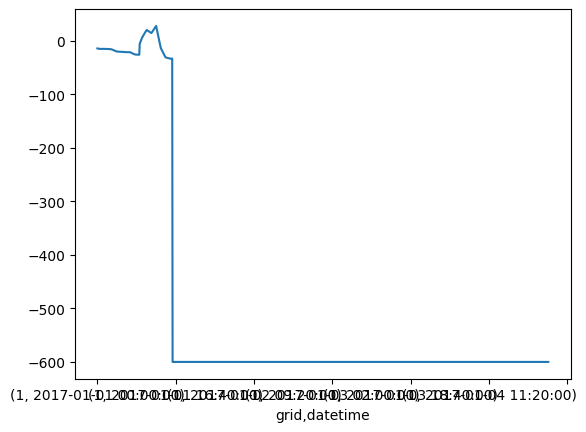

In [ ]:
SMH5 = df_output_merge_SHM5.SUEWS
SMH5.loc[:].loc[:,'QN'].plot()

SMH1 = df_output_merge_SHM1.SUEWS
SMH1 = SMH1.loc[:].loc[:,'QN'].plot()

IndexError: index 0 is out of bounds for axis 0 with size 0

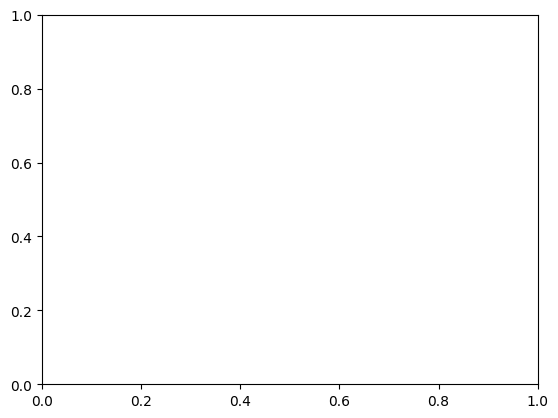

In [23]:
s = '2017-03-01'
e = '2017-03-06'

df_output_merge_SHM5.SUEWS.loc[1].loc[s:e, 'QS'].plot()

In [22]:
s = '2017-01-01'
e = '2017-01-03'

SMH5 = df_output_merge_SMH5.SUEWS
plot_var(SMH5,s,e ,'QS')

NameError: name 'df_output_merge_SMH5' is not defined

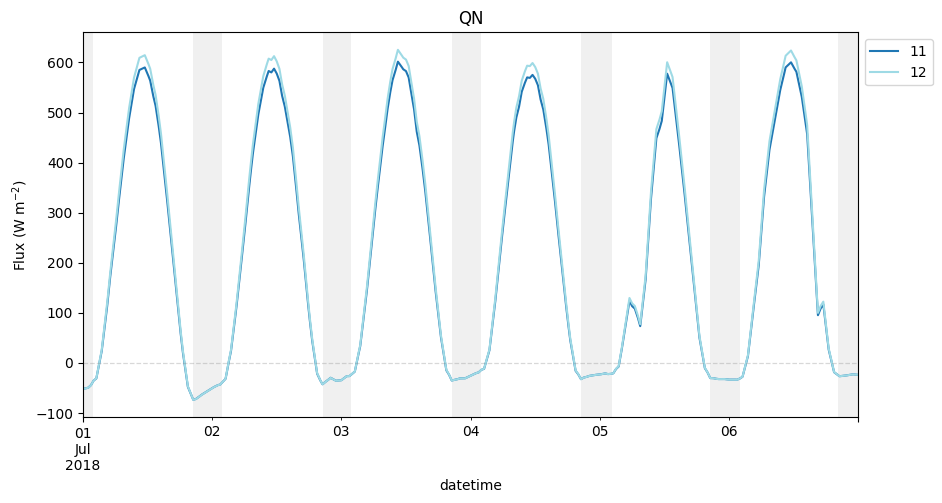

In [57]:
# SMH5 = df_output_SHM5.SUEWS

s = '2018-07-01'
e = '2018-07-06'
plot_var(df_suews_sp, s,e, 'QN')

In [6]:
def plot_var(df_suews, start_date, end_date, var, var2=None, figsize=False):
    # Filter the DataFrame for the specified date range and variables
    columns = [var, 'Kdown']
    if var2:
        columns.append(var2)
    df_filtered = df_suews.loc[(slice(None), slice(start_date, end_date)), columns]
    
    # Pivot the DataFrame to have grids as columns
    df_plot = df_filtered[var].unstack(level=0)
    kdown_plot = df_filtered['Kdown'].unstack(level=0)
    if var2:
        df_plot2 = df_filtered[var2].unstack(level=0)

    if figsize is False:
        figsize = (10, 5)
    
    # Check if df_plot is empty
    if df_plot.empty:
        print("No data available for the specified date range and variable.")
        return
    
    # Plot the data
    fig, ax = plt.subplots(figsize=figsize)
    df_plot.plot(ax=ax, title=var, cmap='tab20')
    ax.axhline(y=0, linestyle='--', alpha=0.3, color='grey', linewidth=0.9)
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.set_ylabel('Flux ($ \mathrm{W \ m^{-2}}$)')
    
    # Plot var2 on secondary axis if provided
    if var2:
        ax2 = ax.twinx()
        df_plot2.plot(ax=ax2, linestyle='--')
        # ax2.set_ylabel(f'{var2} ($ \mathrm{W \ m^{-2}}$)')
        ax2.legend(bbox_to_anchor=(1.0, 0.9))
    
    # Shade areas where Kdown is 0
    for column in kdown_plot.columns:
        zero_regions = kdown_plot[column] < 5
        for start, end in zip(zero_regions.index[zero_regions & ~zero_regions.shift(1, fill_value=False)], 
                              zero_regions.index[zero_regions & ~zero_regions.shift(-1, fill_value=False)]):
            ax.axvspan(start, end, color='grey', alpha=0.058, linewidth=0)

    plt.show()

# ISSUE Spartacus



In [7]:
infolder = 'C:/GitHub/SUEWS_DB_Typology_test/data/'

version = 'a_24'
rc_a24 = infolder + version +'/Runcontrol.nml'

df_state_init_a24 = sp.init_supy(rc_a24)
grid = df_state_init_a24.index[0]
df_forcing = sp.load_forcing_grid(rc_a24, grid)

version = 'b_24'
rc_a24 = infolder + version +'/Runcontrol.nml'
df_state_init_b24 = sp.init_supy(rc_a24)


version = 'd_24'
rc_c24 = infolder + version +'/Runcontrol.nml'
df_state_init_c24 = sp.init_supy(rc_c24)


2024-12-02 19:51:01,770 - SuPy - INFO - All cache cleared.
2024-12-02 19:51:02,816 - SuPy - INFO - All cache cleared.
2024-12-02 19:51:10,343 - SuPy - INFO - All cache cleared.
2024-12-02 19:51:11,384 - SuPy - INFO - All cache cleared.


### a_24 and b_24 mainly same SiteSelect. b_24 has same Code_Bldgs

In [8]:
siteselect = pd.read_csv(infolder + 'a_24'+ '/Input/SUEWS_SiteSelect.txt', delim_whitespace=True)

siteselect.iloc[[0,1,2,3,4,10,11]]

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105
0,Grid,Year,StartDLS,EndDLS,lat,lng,Timezone,SurfaceArea,Alt,z,id,ih,imin,Fr_Paved,Fr_Bldgs,Fr_EveTr,Fr_DecTr,Fr_Grass,Fr_Bsoil,Fr_Water,IrrFr_Paved,IrrFr_Bldgs,IrrFr_EveTr,IrrFr_DecTr,IrrFr_Grass,IrrFr_BSoil,IrrFr_Water,H_Bldgs,H_EveTr,H_DecTr,z0,zd,FAI_Bldgs,FAI_EveTr,FAI_DecTr,PopDensDay,PopDensNight,TrafficRate_WD,TrafficRate_WE,QF0_BEU_WD,QF0_BEU_WE,Code_Paved,Code_Bldgs,Code_EveTr,Code_DecTr,Code_Grass,Code_Bsoil,Code_Water,LUMPS_DrRate,LUMPS_Cover,LUMPS_MaxRes,NARP_Trans,CondCode,SnowCode,SnowClearingProfWD,SnowClearingProfWE,AnthropogenicCode,IrrigationCode,WaterUseProfManuWD,WaterUseProfManuWE,WaterUseProfAutoWD,WaterUseProfAutoWE,FlowChange,RunoffToWater,PipeCapacity,GridConnection1of8,Fraction1of8,GridConnection2of8,Fraction2of8,GridConnection3of8,Fraction3of8,GridConnection4of8,Fraction4of8,GridConnection5of8,Fraction5of8,GridConnection6of8,Fraction6of8,GridConnection7of8,Fraction7of8,GridConnection8of8,Fraction8of8,WithinGridPavedCode,WithinGridBldgsCode,WithinGridEveTrCode,WithinGridDecTrCode,WithinGridGrassCode,WithinGridUnmanBSoilCode,WithinGridWaterCode,AreaWall,Fr_ESTMClass_Paved1,Fr_ESTMClass_Paved2,Fr_ESTMClass_Paved3,Code_ESTMClass_Paved1,Code_ESTMClass_Paved2,Code_ESTMClass_Paved3,Fr_ESTMClass_Bldgs1,Fr_ESTMClass_Bldgs2,Fr_ESTMClass_Bldgs3,Fr_ESTMClass_Bldgs4,Fr_ESTMClass_Bldgs5,Code_ESTMClass_Bldgs1,Code_ESTMClass_Bldgs2,Code_ESTMClass_Bldgs3,Code_ESTMClass_Bldgs4,Code_ESTMClass_Bldgs5
1,1,2017,85,302,57.726197,11.927493,0,16,0,21.599,1,0,0,0.304,0.174,0.025,0.311,0.186,0,0,0,0,0,0,0,0,0,6.442,7.592,7.592,0.242,7.872,0.094,0.263,0.263,42.938,42.938,0.0135,0.0095,0.88,0.88,20248827,20249698,24240014,24240015,24240012,20240025,25240003,0.25,1,10,1,44240002,23240006,60240006,60240007,53240050,61240005,60240000,60240001,60240000,60240001,0,0.1,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,661,662,663,664,665,666,667,46880,0,1,0,99999,807,99999,1,0,0,0,0,801,99999,99999,99999,99999
2,2,2017,85,302,57.722605,11.9275,0,16,0,30.653,1,0,0,0.268,0.128,0.013,0.344,0.247,0,0,0,0,0,0,0,0,0,9.762,10.381,10.381,0.436,10.726,0.066,0.324,0.324,52.5,52.5,0.0135,0.0095,0.88,0.88,20248264,20249062,24240014,24240015,24240012,20240025,25240003,0.25,1,10,1,44240002,23240006,60240006,60240007,53240050,61240005,60240000,60240001,60240000,60240001,0,0.1,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,661,662,663,664,665,666,667,41600,0,1,0,99999,807,99999,1,0,0,0,0,801,99999,99999,99999,99999
3,3,2017,85,302,57.719014,11.927507,0,16,0,24.047,1,0,0,0.473,0.124,0.006,0.131,0.222,0.044,0,0,0,0,0,0,0,0,8.454,7.619,7.619,0.64,7.093,0.046,0.136,0.136,91.063,91.063,0.0135,0.0095,0.88,0.88,20246592,20247190,24240014,24240015,24240012,20240025,25240003,0.25,1,10,1,44240002,23240006,60240006,60240007,53240050,61240005,60240000,60240001,60240000,60240001,0,0.1,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,661,662,663,664,665,666,667,26240,0,1,0,99999,807,99999,1,0,0,0,0,801,99999,99999,99999,99999
4,4,2017,85,302,57.7262,11.934206,0,16,0,21.511,1,0,0,0.395,0.191,0.016,0.168,0.23,0,0,0,0,0,0,0,0,0,8.059,6.248,6.248,0.41,7.271,0.121,0.152,0.152,107.375,107.375,0.0135,0.0095,0.88,0.88,20248002,20249544,24240014,24240015,24240012,20240025,25240003,0.25,1,10,1,44240002,23240006,60240006,60240007,53240050,61240005,60240000,60240001,60240000,60240001,0,0.1,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,661,662,663,664,665,666,667,59360,0,1,0,99999,807,99999,1,0,0,0,0,801,99999,99999,99999,99999
10,10,2017,85,302,57.726207,11.947633,0,16,0,21.823,1,0,0,0.57,0.268,0,0.074,0.086,0,0.002,0,0,0,0,0,0,0,7.33,7.072,7.072,0.238,7.131,0.068,0.055,0.055,20.125,20.125,0.0135,0.0095,0.88,0.88,20244549,20245362,24240014,24240015,24240012,20240025,25240003,0.25,1,10,1,44240002,23240006,60240006,6

## c_24

In [9]:
siteselect = pd.read_csv(infolder + 'c_24'+ '/Input/SUEWS_SiteSelect.txt', delim_whitespace=True)

siteselect.iloc[[0,1]]

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105
0,Grid,Year,StartDLS,EndDLS,lat,lng,Timezone,SurfaceArea,Alt,z,id,ih,imin,Fr_Paved,Fr_Bldgs,Fr_EveTr,Fr_DecTr,Fr_Grass,Fr_Bsoil,Fr_Water,IrrFr_Paved,IrrFr_Bldgs,IrrFr_EveTr,IrrFr_DecTr,IrrFr_Grass,IrrFr_BSoil,IrrFr_Water,H_Bldgs,H_EveTr,H_DecTr,z0,zd,FAI_Bldgs,FAI_EveTr,FAI_DecTr,PopDensDay,PopDensNight,TrafficRate_WD,TrafficRate_WE,QF0_BEU_WD,QF0_BEU_WE,Code_Paved,Code_Bldgs,Code_EveTr,Code_DecTr,Code_Grass,Code_Bsoil,Code_Water,LUMPS_DrRate,LUMPS_Cover,LUMPS_MaxRes,NARP_Trans,CondCode,SnowCode,SnowClearingProfWD,SnowClearingProfWE,AnthropogenicCode,IrrigationCode,WaterUseProfManuWD,WaterUseProfManuWE,WaterUseProfAutoWD,WaterUseProfAutoWE,FlowChange,RunoffToWater,PipeCapacity,GridConnection1of8,Fraction1of8,GridConnection2of8,Fraction2of8,GridConnection3of8,Fraction3of8,GridConnection4of8,Fraction4of8,GridConnection5of8,Fraction5of8,GridConnection6of8,Fraction6of8,GridConnection7of8,Fraction7of8,GridConnection8of8,Fraction8of8,WithinGridPavedCode,WithinGridBldgsCode,WithinGridEveTrCode,WithinGridDecTrCode,WithinGridGrassCode,WithinGridUnmanBSoilCode,WithinGridWaterCode,AreaWall,Fr_ESTMClass_Paved1,Fr_ESTMClass_Paved2,Fr_ESTMClass_Paved3,Code_ESTMClass_Paved1,Code_ESTMClass_Paved2,Code_ESTMClass_Paved3,Fr_ESTMClass_Bldgs1,Fr_ESTMClass_Bldgs2,Fr_ESTMClass_Bldgs3,Fr_ESTMClass_Bldgs4,Fr_ESTMClass_Bldgs5,Code_ESTMClass_Bldgs1,Code_ESTMClass_Bldgs2,Code_ESTMClass_Bldgs3,Code_ESTMClass_Bldgs4,Code_ESTMClass_Bldgs5
1,1,2004,85,302,57.726197,11.927493,0,16,0,21.599,1,0,0,0.304,0.174,0.025,0.311,0.186,0,0,0,0,0,0,0,0,0,6.442,7.592,7.592,0.242,7.872,0.094,0.263,0.263,42.938,42.938,0.0135,0.0095,0.88,0.88,20240019,20240014,24240014,24240015,24240012,20240025,25240003,0.25,1,10,1,44240002,23240006,60240006,60240007,53240050,61240005,60240000,60240001,60240000,60240001,0,0.1,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,661,662,663,664,665,666,667,46880,0,1,0,99999,807,99999,1,0,0,0,0,801,99999,99999,99999,99999


# test Cases

| CASE                | a_SSOHM | a_SSEHC | b_SSOHM | b_SSEHC | c_SSOHM | c_SSEHC |
|---------------------|---------|---------|---------|---------|---------|---------|
| StabilityMethod     | 2       | 2       | 2       | 2       | 2       | 2       |
| RoughLenHeatMethod  | 2       | 2       | 2       | 2       | 2       | 2       |
| RoughLenMomMethod   | 2       | 2       | 2       | 2       | 2       | 2       |
| StorageHeatMethod   | 1       | 5       | 1       | 5       | 1       | 5       |
| NetRadiationMethod  | 1003    | 1003    | 1003    | 1003    | 1003    | 1003    |
| DB                  | Yes     | Yes     | Yes     | Yes     | No      | No      |
| Diff typologies     | Yes     | Yes     | No      | No      | No      | No      |
| Spartacus Data      | DB      | DB      | DB      | DB      | Default | Default |

In [10]:
# Provided dictionaries
spartacus_test_dict = {
    'a_ssohm': {
        'stabilitymethod': 2,
        'roughlenheatmethod': 2,
        'roughlenmommethod': 2,
        'storageheatmethod': 1,
        'netradiationmethod': 1003,
    },
    'a_ssehc': {
        'stabilitymethod': 2,
        'roughlenheatmethod': 2,
        'roughlenmommethod': 2,
        'storageheatmethod': 5,
        'netradiationmethod': 1003,
    },
    'b_ssohm': {
        'stabilitymethod': 2,
        'roughlenheatmethod': 2,
        'roughlenmommethod': 2,
        'storageheatmethod': 1,
        'netradiationmethod': 1003,
    },
    'b_ssehc': {
        'stabilitymethod': 2,
        'roughlenheatmethod': 2,
        'roughlenmommethod': 2,
        'storageheatmethod': 5,
        'netradiationmethod': 1003,
    },
    'c_ssohm': {
        'stabilitymethod': 2,
        'roughlenheatmethod': 2,
        'roughlenmommethod': 2,
        'storageheatmethod': 1,
        'netradiationmethod': 1003,
    },
    'c_ssehc': {
        'stabilitymethod': 2,
        'roughlenheatmethod': 2,
        'roughlenmommethod': 2,
        'storageheatmethod': 5,
        'netradiationmethod': 1003,
    }
}

df_state_init_a_ssohm = df_state_init_a24.copy()
df_state_init_a_ssehc = df_state_init_a24.copy()
df_state_init_b_ssohm = df_state_init_b24.copy()
df_state_init_b_ssehc = df_state_init_b24.copy()
df_state_init_c_ssohm = df_state_init_c24.copy()
df_state_init_c_ssehc = df_state_init_c24.copy()

# Update DataFrames with hardcoded values from spartacus_test_dict
df_state_init_a_ssohm.loc[:, ['stabilitymethod', 'roughlenheatmethod', 'roughlenmommethod', 
                              'storageheatmethod', 'netradiationmethod']] = [
    spartacus_test_dict['a_ssohm']['stabilitymethod'],
    spartacus_test_dict['a_ssohm']['roughlenheatmethod'],
    spartacus_test_dict['a_ssohm']['roughlenmommethod'],
    spartacus_test_dict['a_ssohm']['storageheatmethod'],
    spartacus_test_dict['a_ssohm']['netradiationmethod']
]

df_state_init_a_ssehc.loc[:, ['stabilitymethod', 'roughlenheatmethod', 'roughlenmommethod', 
                              'storageheatmethod', 'netradiationmethod']] = [
    spartacus_test_dict['a_ssehc']['stabilitymethod'],
    spartacus_test_dict['a_ssehc']['roughlenheatmethod'],
    spartacus_test_dict['a_ssehc']['roughlenmommethod'],
    spartacus_test_dict['a_ssehc']['storageheatmethod'],
    spartacus_test_dict['a_ssehc']['netradiationmethod']
]

df_state_init_b_ssohm.loc[:, ['stabilitymethod', 'roughlenheatmethod', 'roughlenmommethod', 
                              'storageheatmethod', 'netradiationmethod']] = [
    spartacus_test_dict['b_ssohm']['stabilitymethod'],
    spartacus_test_dict['b_ssohm']['roughlenheatmethod'],
    spartacus_test_dict['b_ssohm']['roughlenmommethod'],
    spartacus_test_dict['b_ssohm']['storageheatmethod'],
    spartacus_test_dict['b_ssohm']['netradiationmethod']
]

df_state_init_b_ssehc.loc[:, ['stabilitymethod', 'roughlenheatmethod', 'roughlenmommethod', 
                              'storageheatmethod', 'netradiationmethod']] = [
    spartacus_test_dict['b_ssehc']['stabilitymethod'],
    spartacus_test_dict['b_ssehc']['roughlenheatmethod'],
    spartacus_test_dict['b_ssehc']['roughlenmommethod'],
    spartacus_test_dict['b_ssehc']['storageheatmethod'],
    spartacus_test_dict['b_ssehc']['netradiationmethod']
]

df_state_init_c_ssohm.loc[:, ['stabilitymethod', 'roughlenheatmethod', 'roughlenmommethod', 
                              'storageheatmethod', 'netradiationmethod']] = [
    spartacus_test_dict['c_ssohm']['stabilitymethod'],
    spartacus_test_dict['c_ssohm']['roughlenheatmethod'],
    spartacus_test_dict['c_ssohm']['roughlenmommethod'],
    spartacus_test_dict['c_ssohm']['storageheatmethod'],
    spartacus_test_dict['c_ssohm']['netradiationmethod']
]

df_state_init_c_ssehc.loc[:, ['stabilitymethod', 'roughlenheatmethod', 'roughlenmommethod', 
                              'storageheatmethod', 'netradiationmethod']] = [
    spartacus_test_dict['c_ssehc']['stabilitymethod'],
    spartacus_test_dict['c_ssehc']['roughlenheatmethod'],
    spartacus_test_dict['c_ssehc']['roughlenmommethod'],
    spartacus_test_dict['c_ssehc']['storageheatmethod'],
    spartacus_test_dict['c_ssehc']['netradiationmethod']
]


In [15]:
grids = [1,2,3,4,10,11]

s = '2016-12-31'
e = '2017-01-02'

df_forcing['U'] = df_forcing['U'].apply(lambda x: x if x >= 0.5 else 0.5)

df_forcing_sel = df_forcing.loc[s:e]

df_output_merge_a_ssohm , df_state_final_merge_SHM1 = process_in_chunks( df_state_init_a_ssohm.loc[grids], df_forcing_sel, 3)
df_output_merge_a_ssehc , df_state_final_merge_SHM1 = process_in_chunks( df_state_init_a_ssehc.loc[grids], df_forcing_sel, 3)

df_output_merge_b_ssohm , df_state_final_merge_SHM1 = process_in_chunks( df_state_init_b_ssohm.loc[grids], df_forcing_sel, 3)
df_output_merge_b_ssehc , df_state_final_merge_SHM1 = process_in_chunks( df_state_init_b_ssehc.loc[grids], df_forcing_sel, 3)

df_output_merge_c_ssohm , df_state_final_merge_SHM1 = process_in_chunks( df_state_init_c_ssohm, df_forcing_sel, 3)
df_output_merge_c_ssehc , df_state_final_merge_SHM1 = process_in_chunks( df_state_init_c_ssehc, df_forcing_sel, 3)


2
2024-12-02 20:33:06,916 - SuPy - INFO - ====================
2024-12-02 20:33:06,916 - SuPy - INFO - Simulation period:
2024-12-02 20:33:06,917 - SuPy - INFO -   Start: 2016-12-31 23:05:00
2024-12-02 20:33:06,918 - SuPy - INFO -   End: 2017-01-02 23:55:00
2024-12-02 20:33:06,918 - SuPy - INFO - 
2024-12-02 20:33:06,919 - SuPy - INFO - No. of grids: 3
2024-12-02 20:33:06,919 - SuPy - INFO - SuPy is running in serial mode
2024-12-02 20:35:00,062 - SuPy - INFO - Execution time: 113.1 s
2024-12-02 20:35:00,063 - SuPy - INFO - ====================

2024-12-02 20:35:00,064 - SuPy - INFO - ====================
2024-12-02 20:35:00,065 - SuPy - INFO - Simulation period:
2024-12-02 20:35:00,066 - SuPy - INFO -   Start: 2016-12-31 23:05:00
2024-12-02 20:35:00,067 - SuPy - INFO -   End: 2017-01-02 23:55:00
2024-12-02 20:35:00,067 - SuPy - INFO - 
2024-12-02 20:35:00,068 - SuPy - INFO - No. of grids: 3
2024-12-02 20:35:00,069 - SuPy - INFO - SuPy is running in serial mode
2024-12-02 20:36:35,627 

In [12]:
def create_subplots(var, grids, s, e):
    a_ssohm = df_output_merge_a_ssohm.SUEWS
    a_ssehc = df_output_merge_a_ssehc.SUEWS
    b_ssohm = df_output_merge_b_ssohm.SUEWS
    b_ssehc = df_output_merge_b_ssehc.SUEWS
    c_ssohm = df_output_merge_c_ssohm.SUEWS
    c_ssehc = df_output_merge_c_ssehc.SUEWS

    fig, axs = plt.subplots(3, 2, figsize=(15, 10))
    
    # First column (SSOHM)
    axs[0, 0].plot(merge_grids_to_df(a_ssohm, grids, s, e, var))
    axs[0, 0].set_title('SSOHM - A')
    
    axs[1, 0].plot(merge_grids_to_df(b_ssohm, grids, s, e, var))
    axs[1, 0].set_title('SSOHM - B')
    
    axs[2, 0].plot(merge_grids_to_df(c_ssohm, [1], s, e, var))
    axs[2, 0].set_title('SSOHM - C')
    
    # Second column (SSEHC)
    axs[0, 1].plot(merge_grids_to_df(a_ssehc, grids, s, e, var))
    axs[0, 1].set_title('SSEHC - A')
    
    axs[1, 1].plot(merge_grids_to_df(b_ssehc, grids, s, e, var))
    axs[1, 1].set_title('SSEHC - B')
    
    axs[2, 1].plot(merge_grids_to_df(c_ssehc, [1], s, e, var))
    axs[2, 1].set_title('SSEHC - C')
    
    for ax in axs.flat:
        ax.label_outer()
    
    plt.tight_layout()
    plt.show()


def create_subplots_with_secondary_axis(var, grids, s, e, secondary_var):
    a_ssohm = df_output_merge_a_ssohm.SUEWS
    a_ssehc = df_output_merge_a_ssehc.SUEWS
    b_ssohm = df_output_merge_b_ssohm.SUEWS
    b_ssehc = df_output_merge_b_ssehc.SUEWS
    c_ssohm = df_output_merge_c_ssohm.SUEWS
    c_ssehc = df_output_merge_c_ssehc.SUEWS

    secondary_data = df_forcing.loc[s:e, secondary_var]

    fig, axs = plt.subplots(3, 2, figsize=(15, 10))
    
    # First column (SSOHM)
    ax1 = axs[0, 0]
    ax1.plot(merge_grids_to_df(a_ssohm, grids, s, e, var), label=var)
    ax2 = ax1.twinx()
    ax2.plot(secondary_data, color='grey', label=secondary_var, alpha = 0.5)
    ax1.set_title('SSOHM - A')
    
    ax1 = axs[1, 0]
    ax1.plot(merge_grids_to_df(b_ssohm, grids, s, e, var), label=var)
    ax2 = ax1.twinx()
    ax2.plot(secondary_data, color='grey', label=secondary_var, alpha = 0.5)
    ax1.set_title('SSOHM - B')
    
    ax1 = axs[2, 0]
    ax1.plot(merge_grids_to_df(c_ssohm, [1], s, e, var), label=var)
    ax2 = ax1.twinx()
    ax2.plot(secondary_data, color='grey', label=secondary_var, alpha = 0.5)
    ax1.set_title('SSOHM - C')
    
    # Second column (SSEHC)
    ax1 = axs[0, 1]
    ax1.plot(merge_grids_to_df(a_ssehc, grids, s, e, var), label=var)
    ax2 = ax1.twinx()
    ax2.plot(secondary_data, color='grey', label=secondary_var, alpha = 0.5)
    ax1.set_title('SSEHC - A')
    
    ax1 = axs[1, 1]
    ax1.plot(merge_grids_to_df(b_ssehc, grids, s, e, var), label=var)
    ax2 = ax1.twinx()
    ax2.plot(secondary_data, color='grey', label=secondary_var, alpha = 0.5)
    ax1.set_title('SSEHC - B')
    
    ax1 = axs[2, 1]
    ax1.plot(merge_grids_to_df(c_ssehc, [1], s, e, var), label=var)
    ax2 = ax1.twinx()
    ax2.plot(secondary_data, color='grey', label=secondary_var, alpha = 0.5)
    ax1.set_title('SSEHC - C')
    
    for ax in axs.flat:
        ax.label_outer()
    
    plt.tight_layout()
    plt.show()


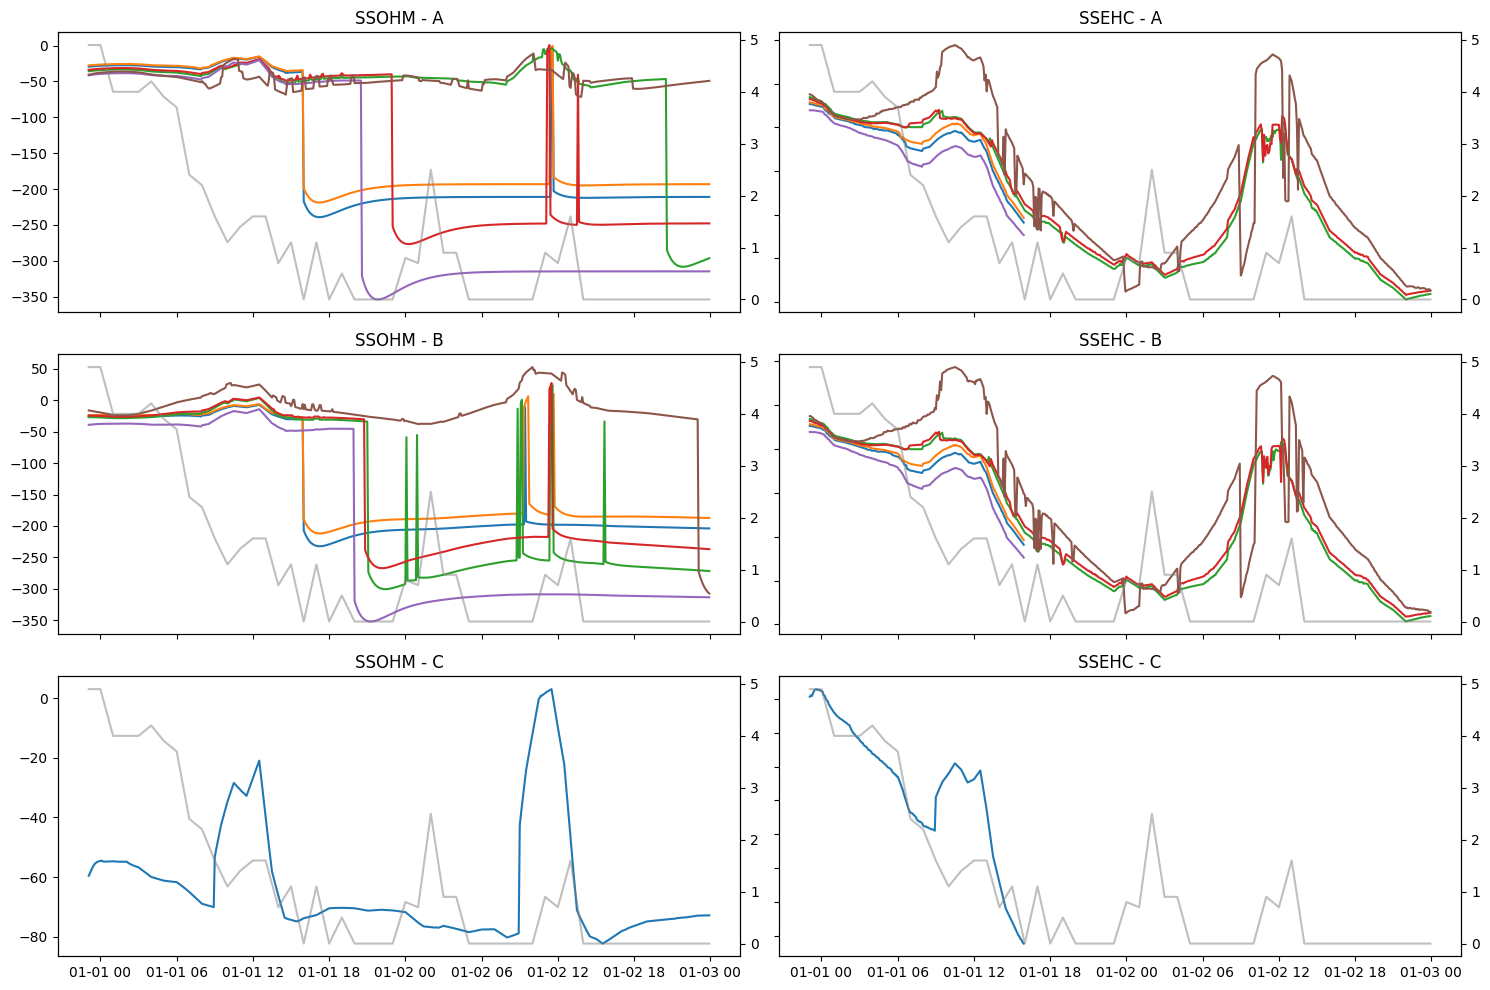

In [14]:
create_subplots_with_secondary_axis('QS', grids, s, e, 'U')

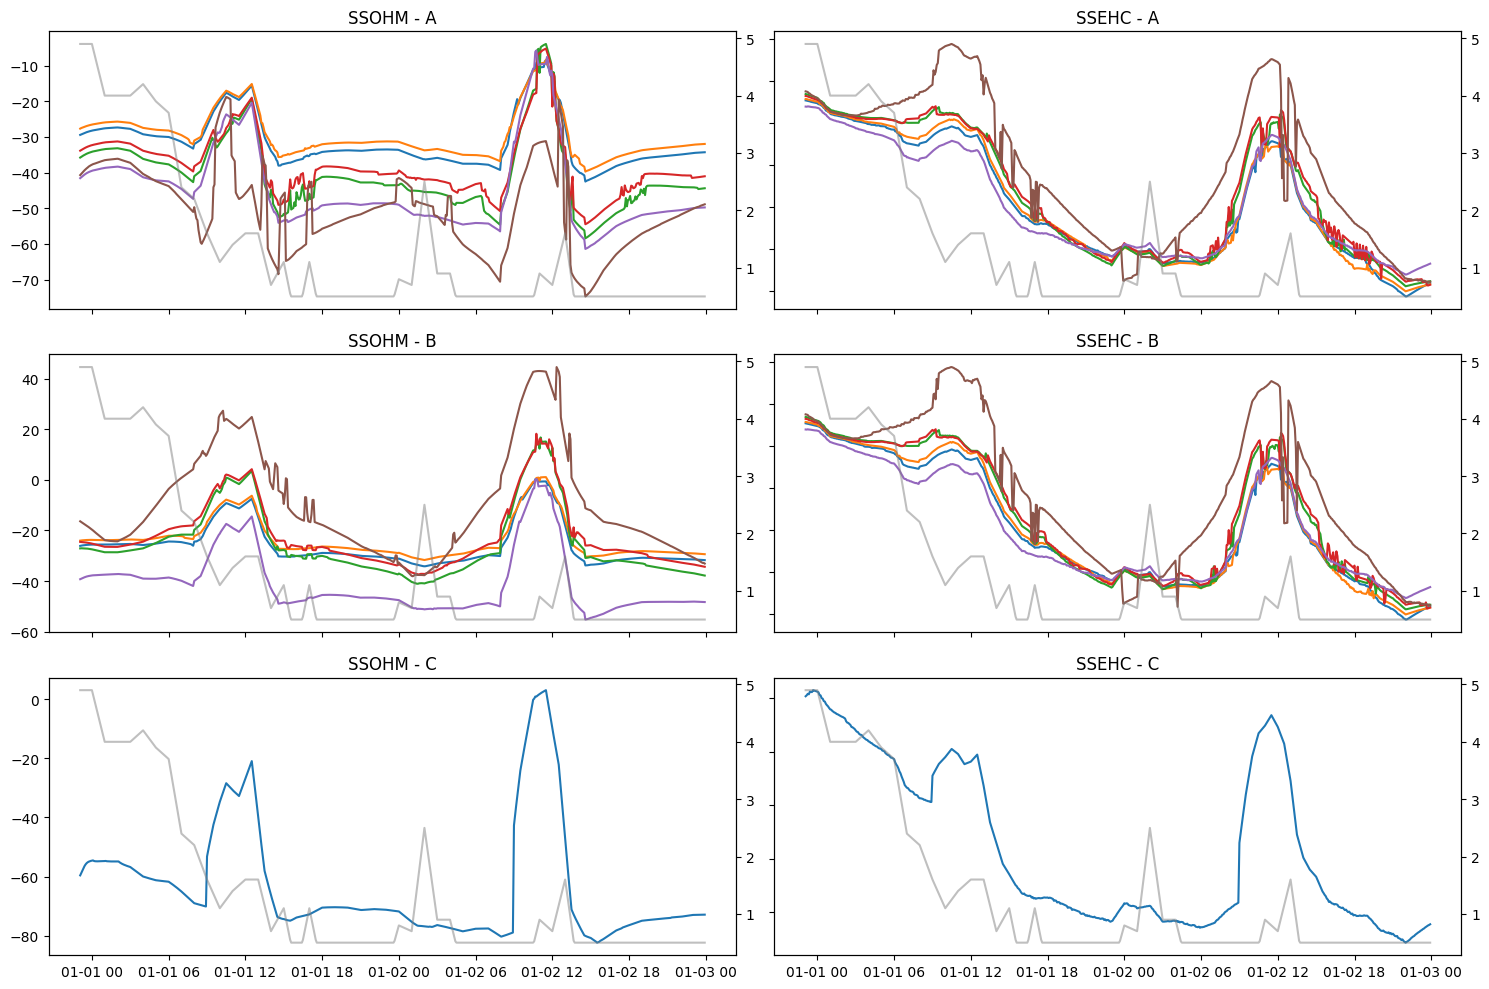

In [16]:
create_subplots_with_secondary_axis('QS', grids, s, e, 'U')